# <center>Computing the count rate of observing HAT-P-11 with the APO 3.5m telescope using ``synphot``</center>

In [120]:
%matplotlib inline
import matplotlib.pyplot as plt
import astropy.units as u
from synphot.models import BlackBody1D, BlackBodyNorm1D
from synphot.spectrum import SourceSpectrum

### Compute the photon flux (of HAT-P-11)

Without a spectrum of the star, we approximate it as a blackbody

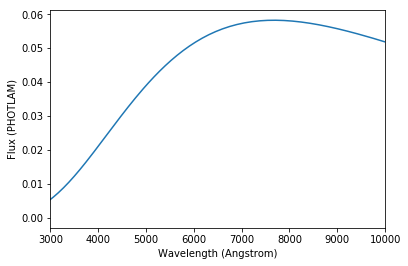

In [119]:
T_eff = 4780  # temperature [K]

# Use synphot.models and synphot.spectrum module to generate a blackbody spectrum
photlam_hatp11 = SourceSpectrum(BlackBody1D, temperature=T_eff)  # in photon s-1 cm^-2 AA^-1

# Compute the flux at Earth from the luminosity 
R_hatp11 = 0.683 * u.R_sun  # radius in solar units
d = (123 * u.lyr).to(u.R_sun)  # distance to HATP11 in solar radii
photlam_hatp11 = photlam_hatp11 * (R_hatp11 / d) ** 2

photlam_hatp11.plot(left=3000, right=10000)

### Simulate the observation with a specific instrument

<p>Let's observe HAT-P-11 with the Agile instrument on APO's 3.5m telescope, whose net wavelength transmission can be downloaded from <a href="https://www.apo.nmsu.edu/arc35m/Instruments/AGILE/Anjum/wav.dat">APO's website</a>. We will use this to construct a bandpass specific to Agile.</p><p>To construct a bandpass from a file with ``synphot``, use the ``SpectralElement`` class:</p>

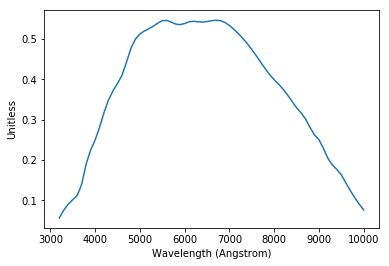

In [111]:
from synphot import SpectralElement

agile = SpectralElement.from_file('agile.dat', wave_unit="nm")
agile.plot()

Convolve the source spectrum with this bandpass using ``synphot``'s ``Observation``:

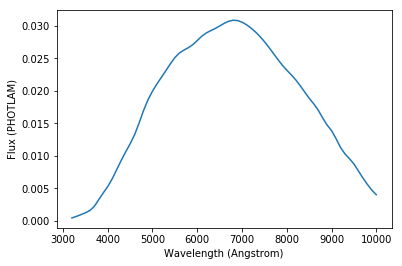

In [124]:
from synphot import Observation
import numpy as np

obs = Observation(photlam_hatp11, agile)
obs.plot()

To get the expected count rate for a specific collecting area, use the ``countrate()`` method: 

In [131]:
r = 3.5 / 2 * u.m  # radius of 3.5m ARC telescope at APO
area = np.pi * r.to(u.cm) ** 2

cr = obs.countrate(area=area)
print(cr)

11852206.200075638 ct / s


How many photons can be expected in a 10 second exposure?

In [130]:
cr * 10 * u.s

<Quantity 1.18522062e+08 ct>